In [6]:
# Importing Library
import pandas as pd
import numpy as num

In [7]:
import os
os.getcwd()

'C:\\Users\\Administrator\\Project Machine Learning\\Data Analysis Web App'

In [8]:
# Getting Data from Source
Match = pd.read_csv('matches.csv')
Delivery = pd.read_csv('deliveries.csv')

In [9]:
Match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
Match.shape

(756, 18)

In [11]:
Delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
Delivery.shape

(179078, 21)

In [13]:
Total_Score_Data = Delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [14]:
Total_Score_Data

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [15]:
Total_Score_Data = Total_Score_Data[Total_Score_Data ['inning'] == 1]

In [16]:
Total_Score_Data

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [17]:
Match_Data = Match.merge(Total_Score_Data[['match_id','total_runs']],left_on ='id', right_on ='match_id')

In [18]:
Match_Data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [19]:
Match_Data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
Match_Data['team1'].nunique()

15

In [21]:
Teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 
       'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 
       'Delhi Capitals'
    ]

In [22]:
Match_Data['team1'] = Match_Data['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
Match_Data['team2'] = Match_Data['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

Match_Data['team1'] = Match_Data['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
Match_Data['team2'] = Match_Data['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [23]:
Match_Data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [24]:
#For choosing Particular team name.
Match_Data = Match_Data[Match_Data['team1'].isin(Teams)]
Match_Data = Match_Data[Match_Data['team2'].isin(Teams)]

In [25]:
Match_Data['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [26]:
Match_Data.shape

(641, 20)

In [27]:
Match_Data = Match_Data[Match_Data['dl_applied'] == 0]

In [28]:
Match_Data = Match_Data[['match_id','city','winner','total_runs']]

In [29]:
Delivery_Data = Match_Data.merge(Delivery,on = 'match_id')

In [30]:
Delivery_Data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
Delivery_Data = Delivery_Data[Delivery_Data['inning']==2]

In [32]:
Delivery_Data.shape

(72413, 24)

In [33]:
Delivery_Data['current_score']=Delivery_Data.groupby('match_id')['total_runs_y'].cumsum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\3194965974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['current_score']=Delivery_Data.groupby('match_id')['total_runs_y'].cumsum()


In [34]:
Delivery_Data.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [35]:
# Total runs Left
Delivery_Data['runs_left']= Delivery_Data['total_runs_x'] - Delivery_Data['current_score'] 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\4145965310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['runs_left']= Delivery_Data['total_runs_x'] - Delivery_Data['current_score']


In [36]:
Delivery_Data.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200


In [37]:
# Total Ball Left
Delivery_Data['balls_left']= 126 - (Delivery_Data['over']*6 + Delivery_Data['ball'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\3735122215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['balls_left']= 126 - (Delivery_Data['over']*6 + Delivery_Data['ball'])


In [38]:
Delivery_Data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [39]:
# Filling missing values in 'player_dismissed' column with "0"
Delivery_Data['player_dismissed_New'] = Delivery_Data['player_dismissed'].fillna("0",inplace = True)

# Convert to binary values
Delivery_Data['player_dismissed_New'] = Delivery_Data['player_dismissed'].apply(lambda x: x if str(x) == "0" else "1")

# Convert 'player_dismissed' column to integer type
Delivery_Data['player_dismissed_New'] = Delivery_Data['player_dismissed_New'].astype('int')

# Assuming 'match_id' is a numeric type column
# If 'match_id' is not numeric, convert it to an appropriate numeric type before using cumsum
Delivery_Data['wickets'] = Delivery_Data.groupby('match_id')['player_dismissed_New'].cumsum()

# Assuming 10 wickets in a match, calculating remaining wickets
Delivery_Data['wickets'] = 10 - Delivery_Data['wickets']

# Displaying the first 5 rows of the DataFrame
Delivery_Data


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\418550049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['player_dismissed_New'] = Delivery_Data['player_dismissed'].fillna("0",inplace = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\418550049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['player_dismissed_New'] = Delivery_Data['player_dismissed'].fillna("0",inplace = True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\418550049.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,0,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,0,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,0,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,0,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,0,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,0,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,SR Watson,run out,KH Pandya,155,-3,2,1,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,0,4


In [40]:
Delivery_Data.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,0,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,0,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,SR Watson,run out,KH Pandya,155,-3,2,1,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,0,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,SN Thakur,lbw,NaN,157,-5,0,1,3


In [41]:
# Current Run rate = Runs/overs #crr
Delivery_Data['CRR'] = (Delivery_Data['current_score']*6) / (120 - Delivery_Data['balls_left'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\1444634389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['CRR'] = (Delivery_Data['current_score']*6) / (120 - Delivery_Data['balls_left'])


In [42]:
Delivery_Data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets,CRR
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,0,10,6.000000
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,0,10,3.000000
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,0,10,2.000000
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,0,10,4.500000
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,0,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,0,5,7.862069
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,0,5,7.897436
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,SR Watson,run out,KH Pandya,155,-3,2,1,4,7.881356
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,0,4,7.915966


In [43]:
# Required Run Rate 
Delivery_Data['RRR'] = (Delivery_Data['runs_left']*6)/Delivery_Data['balls_left']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\1355079284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data['RRR'] = (Delivery_Data['runs_left']*6)/Delivery_Data['balls_left']


In [44]:
Delivery_Data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets,CRR,RRR
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,0,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,0,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,0,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,0,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,0,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,0,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,0,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,SR Watson,run out,KH Pandya,155,-3,2,1,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,0,4,7.915966,-30.000000


In [45]:
def result(row):
    if row["batting_team"] == row['winner']:
        return 1
    else: 
        return 0


In [46]:
Delivery_Data["Result"] = Delivery_Data.apply(result,axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\3385941622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_Data["Result"] = Delivery_Data.apply(result,axis=1)


In [47]:
Delivery_Data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets,CRR,RRR,Result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,206,119,0,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,206,118,0,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,206,117,0,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,204,116,0,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,200,115,0,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,152,0,4,0,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,154,-2,3,0,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,run out,KH Pandya,155,-3,2,1,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,157,-5,1,0,4,7.915966,-30.000000,0


In [48]:
Data_For_ML = Delivery_Data[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','CRR','RRR','Result']]

In [49]:
Data_For_ML

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR,Result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [50]:
# For Shuffling all data
Data_For_ML.sample(Data_For_ML.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR,Result
15939,Rajasthan Royals,Kings XI Punjab,Chandigarh,80,29,5,221,9.296703,16.551724,0
133674,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,134,100,10,183,14.700000,8.040000,1
109653,Mumbai Indians,Delhi Daredevils,Mumbai,111,83,6,152,6.648649,8.024096,1
51307,Chennai Super Kings,Mumbai Indians,Mumbai,105,75,8,164,7.866667,8.400000,0
100486,Chennai Super Kings,Kings XI Punjab,Mumbai,30,1,3,226,9.882353,180.000000,0
...,...,...,...,...,...,...,...,...,...,...
29351,Deccan Chargers,Delhi Daredevils,Durban,87,55,7,173,7.938462,9.490909,0
43232,Kings XI Punjab,Mumbai Indians,Chandigarh,86,71,9,154,8.326531,7.267606,1
110805,Delhi Daredevils,Sunrisers Hyderabad,Raipur,159,118,10,163,12.000000,8.084746,0
111788,Delhi Daredevils,Chennai Super Kings,Raipur,119,119,10,119,0.000000,6.000000,1


In [51]:
Data_For_ML.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR,Result
72641,Mumbai Indians,Royal Challengers Bangalore,Bangalore,154,115,10,156,2.4,8.034783,0


In [52]:
Data_For_ML.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
CRR               0
RRR               7
Result            0
dtype: int64

In [53]:
Data_For_ML.dropna(inplace= True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\209441723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_For_ML.dropna(inplace= True)


In [54]:
Data_For_ML= Data_For_ML[Data_For_ML['balls_left'] != 0]

In [55]:
X = Data_For_ML.iloc[:,:-1]
y = Data_For_ML.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state = 45)

In [56]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR
78483,Kolkata Knight Riders,Kings XI Punjab,Kolkata,133,101,8,149,5.052632,7.900990
49461,Kings XI Punjab,Chennai Super Kings,Chandigarh,37,24,6,188,9.437500,9.250000
69755,Mumbai Indians,Kolkata Knight Riders,Mumbai,132,103,10,140,2.823529,7.689320
60189,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,84,29,3,165,5.340659,17.379310
35231,Kolkata Knight Riders,Chennai Super Kings,Kolkata,103,66,5,164,6.777778,9.363636
...,...,...,...,...,...,...,...,...,...
27129,Rajasthan Royals,Royal Challengers Bangalore,Centurion,102,111,10,105,2.000000,5.513514
128233,Delhi Daredevils,Chennai Super Kings,Pune,119,48,6,218,8.250000,14.875000
12720,Rajasthan Royals,Chennai Super Kings,Jaipur,6,43,8,109,8.025974,0.837209
132714,Kings XI Punjab,Mumbai Indians,Mumbai,122,71,9,197,9.183673,10.309859


In [57]:
y_train

78483     1
49461     1
69755     0
60189     0
35231     0
         ..
27129     1
128233    0
12720     1
132714    0
13839     0
Name: Result, Length: 49939, dtype: int64

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [59]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [60]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example DataFrame with categorical columns
data = {'category': ['A', 'B', 'A', 'C']}
df = pd.DataFrame(data)

# Creating the OneHotEncoder with sparse=False and drop='first'
encoder = OneHotEncoder(sparse=False, drop='first')

# Transforming the categorical column
encoded_data = encoder.fit_transform(df[['category']])

# Displaying the result
print(encoded_data)
df

[[0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,category
0,A
1,B
2,A
3,C


In [61]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear')) #''' for finding wining probability of both team in every stage 
                                                      #(Use this for better result or probability)'''
#     ('step2',RandomForestClassifier()) # for getting maximum accucay of 
])

In [62]:
pipe.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [63]:
X_train.describe(include = 'all')

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,CRR,RRR
count,49939,49939,49939,49939.000000,49939.000000,49939.000000,49939.000000,49939.000000,49939.000000
unique,10,10,29,NaN,NaN,NaN,NaN,NaN,NaN
top,Kolkata Knight Riders,Mumbai Indians,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN
freq,6715,7356,6932,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,92.819219,62.959431,7.555698,165.848856,7.441442,10.331393
std,NaN,NaN,NaN,50.137106,33.294208,2.122051,29.299579,2.282673,13.462541
min,NaN,NaN,NaN,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,NaN,NaN,NaN,53.000000,35.000000,6.000000,147.000000,6.260870,7.166667
50%,NaN,NaN,NaN,92.000000,64.000000,8.000000,165.000000,7.500000,8.880000
75%,NaN,NaN,NaN,130.000000,92.000000,9.000000,185.000000,8.696629,10.875000


In [64]:
y_pred = pipe.predict(X_test)

In [65]:
y_pred.T[6] 

0

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8036723823763023

In [67]:
pipe.predict_proba(X_test)[5] # change X_test value for finding probability of winning team.

array([0.68245644, 0.31754356])

In [62]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [63]:
gg =Delivery_Data[Delivery_Data['match_id'] == 15]
gg[gg['ball']==6]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,player_dismissed_New,wickets,CRR,RRR,Result
2060,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,1,6,M Vohra,...,NaN,NaN,2,186,114,0,10,2.000000,9.789474,0
2066,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,2,6,HM Amla,...,NaN,NaN,6,182,108,0,9,3.000000,10.111111,0
2072,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,3,6,HM Amla,...,NaN,NaN,17,171,102,0,9,5.666667,10.058824,0
2078,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,4,6,HM Amla,...,NaN,NaN,26,162,96,0,8,6.500000,10.125000,0
2084,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,5,6,EJG Morgan,...,NaN,NaN,33,155,90,0,7,6.600000,10.333333,0
2090,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,6,6,DA Miller,...,NaN,NaN,40,148,84,0,7,6.666667,10.571429,0
2096,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,7,6,DA Miller,...,NaN,NaN,46,142,78,0,7,6.571429,10.923077,0
2103,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,8,6,DA Miller,...,NaN,NaN,49,139,72,0,7,6.125000,11.583333,0
2109,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,9,6,EJG Morgan,...,NaN,NaN,53,135,66,0,7,5.888889,12.272727,0
2115,15,Delhi,Delhi Daredevils,188,2,Kings XI Punjab,Delhi Daredevils,10,6,EJG Morgan,...,caught,KK Nair,64,124,60,1,6,6.400000,12.400000,0


In [64]:
import numpy as np
import pandas as pd
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','CRR','RRR']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [65]:
temp_df,target = match_progression(Delivery_Data,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,88.5,11.5
136,2,1,0,91.6,8.4
142,3,16,0,84.2,15.8
148,4,11,0,78.7,21.3
155,5,5,0,79.2,20.8
162,6,10,1,84.2,15.8
168,7,7,1,90.0,10.0
174,8,13,0,84.8,15.2
180,9,10,0,80.6,19.4
187,10,10,0,75.7,24.3


Text(0.5, 1.0, 'Target-207')

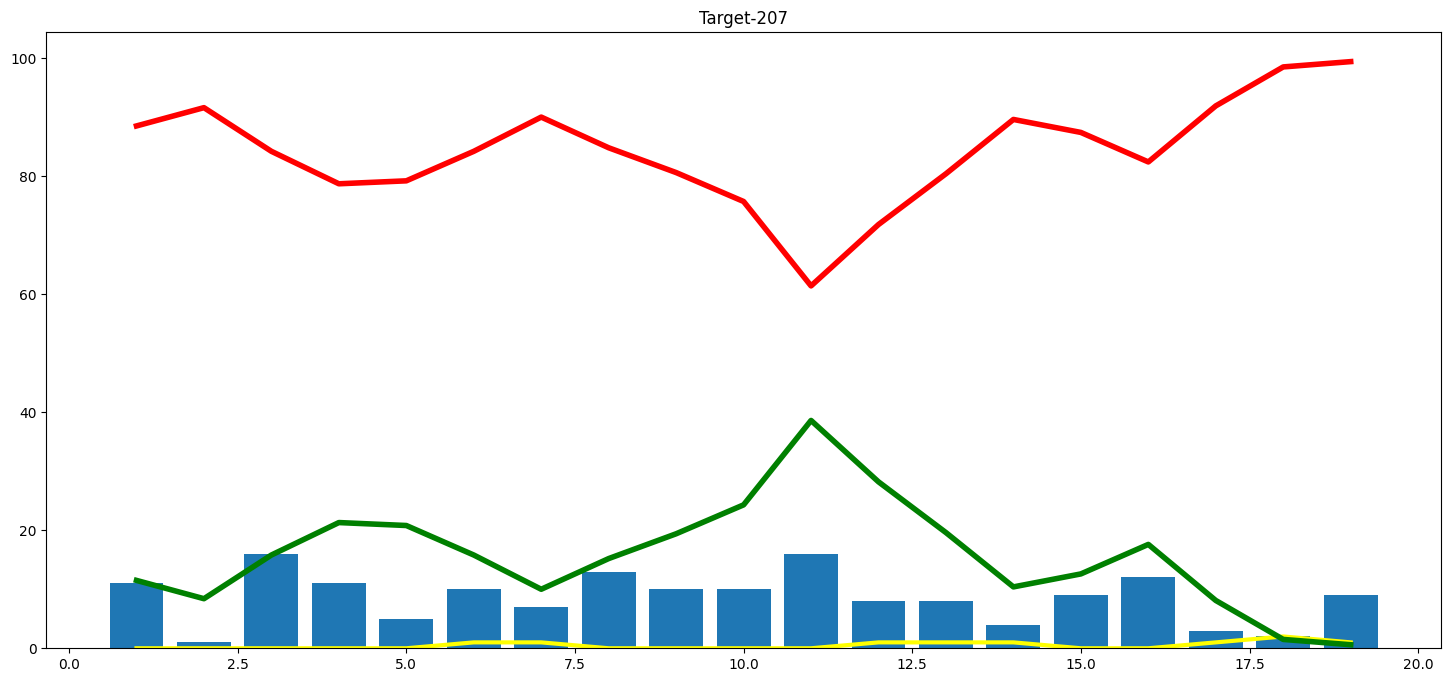

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [67]:
Teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [68]:
Data_For_ML['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru'], dtype=object)

In [896]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [72]:
Data_For_ML['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru'], dtype=object)